# CONTEXT: PRODUCT INNOVATION CASE  
## BANKING INDUSTRY | ACCENBANK  
### Data & AI Analysts  

Camila informed Johanna that AccenBank has been compiling relevant information from the Customer Support team for some time. Currently, AccenBank has utilized the provided information to conduct quality control on the Bank’s Customer Support team. Nevertheless, they have plans to expand the scope of the data and use it in other processes such as creating new products, mapping potential customers, and retention plans. Camila believes that this data could be useful in addressing the challenge of choosing the best product and strategy.

In detail, AccenBank has **three datasets available**:

- The first dataset consists of PQRs, summarizing the attention provided by the Customer Service team to the end user.
- This dataset is complemented by two others containing information about the **business segment** and the **client's products**.
- Additionally, there is a **data dictionary** for better understanding.

Johanna asks the Accenture team, with an emphasis on data, to analyze the datasets provided by the bank along with the information.  

To deliver the results, please generate a presentation answering the questions and a Dashboard (in the tool of your choice) with the management indicators relevant to the business.  

For a successful analysis, Johanna provides the Accenture team with the following guiding questions:  

1. **What is the distribution of PQRs over time (date)?**  

2. **How are PQRs distributed in different typologies and what conclusions can be drawn from this?**  

3. **Does it make sense to analyze typologies? Why?**  

4. **What analysis do you propose for the development by typology that can extract the greatest possible value from the data?**  

5. **What are the most consulted products in the Bank's database?**  

6. **What is the distribution of PQRs by contact channel and what conclusions can be drawn from that?**  

7. **What would you propose to improve the user experience and the way the bank manages PQRs?**  

8. **Optional:** Use the "" column to extract the most frequent reasons for query in calls received in the Bank’s call center.

# 1. Importing Libraries

In [14]:
import pandas as pd #This library is used for data manipulation and analysis
import matplotlib.pyplot as plt #This library is used for visualization
import seaborn as sns #This library is used for data visualization

# 2. Importing Data

In [15]:
# Browsing the datasets it can be seen that the data in PQRs_consolidation and business_segment is separated by "|" instead of ",", changing the separator to "|" in the read_csv function
pqr_df = pd.read_csv('datasets/PQRs_consolidation.csv', sep='|')
business_segment_df = pd.read_csv('datasets/business_segment.csv', sep='|')
products_df = pd.read_csv('datasets/products.csv', sep=',')

## 2.1 Verifying the first rows of the datasets

In [16]:
pqr_df.head()

,Unnamed: 0,SOLICITUD,Nombre Tipologia,Tipologia,Descripcion Suborigen,Flujo,Fecha Radicacion Caso,Tipo ID Cliente,ID Cliente 2,CANAL1,CANAL2,Tipologia Squad,Atencion,"Inidicador fecha,,",DATE,Motivo,Motivo_Limpiado
0,0,10672651,Compra No Pertenece en TC,Servicio,FRAUDE,323,2023-06-07 10:40:34 10:40:34,C,10000264834,Call Center,Canales Banco,Tipologías de Servicio,Back Service,"4,,",2023-06-07,cliente reclama por compra correo: natha*...,cliente reclama por compra correo: natha*...
1,1,10605243,Aclaración Productos Servicio,Servicio,Aclaración deuda/ Disponible,8,2023-05-08 06:59:22 06:59:22,C,10000018169,Chat,Canales Banco,Tipologías de Servicio,Back Service,"4,,",2023-05-08,********-******** dando alcance al radicado *...,********-******** dando alcance al radicado *...
2,2,10491337,Cambio Tipo de Producto,Servicio,Unificación Cupos TC,212,2023-03-15 10:51:17 10:51:17,C,10000254379,Call Center,Canales Banco,Tipologías de Servicio,Back Service,"4,,",2023-03-15,gscl cliente cuenta con productos en mora(va...,gscl cliente cuenta con productos en mora(va...
3,3,10061330,Cobro Servicios Bancar Middle,Servicio,Comisión tranx cajero automati,1,2022-08-30 03:42:33 03:42:33,C,10000157427,Call Center,Canales Banco,Cobro de Servicios Bancarios,Back Service,"1,,",2022-08-30,NaN,NaN
4,4,10307260,Compra No Pertenece en TC,Servicio,FRAUDE,323,2022-12-15 10:53:14 10:53:14,C,10000248252,Call Center,Canales Banco,Tipologías de Servicio,Back Service,"3,,",2022-12-15,NaN,NaN


In [17]:
business_segment_df.head()

,ID Cliente 2,Segmento
0,10000264834,CLASICO
1,10000018169,PREMIUM
2,10000254379,CLASICO
3,10000157427,CLASICO
4,10000248252,CLASICO


In [18]:
products_df.head()

,Tipo Producto,Nombre Producto,Subproducto,Nombre Subproducto,ID Cliente 2
0,2,Tarjeta credito Master,44,MMBL,10000264834
1,12,Tarjeta Visa,21,VIS INTE AV,10000018169
2,2,Tarjeta credito Master,4,MOR,10000254379
3,1,Tarjeta Credito Visa,62,CENS G,10000157427
4,1,Tarjeta Credito Visa,62,CENS G,10000248252


# 3 Data Preparation

## 3.1 Deleting columns that are not relevant for the analysis

In [19]:
# Deleting the columns that are not relevant for the analysis
# Unnamed: 0: This column is not relevant for the analysis and it is a duplicate of the index
# Motivo: there is another column called Motivo_Limpiado that is already cleaned
# SOLICITUD: is the id of the request, it is not relevant for the analysis
# Fecha Radicacion Caso: the date is already in the DATE column
# Inidicador fecha,,: is related to the date, thus it is redundant

#Deleting Unnamed: 0, first column
pqr_df.drop(pqr_df.columns[0], axis=1, inplace=True)
pqr_df.drop(columns=['Motivo'], inplace=True)
pqr_df.drop(columns=['SOLICITUD'], inplace=True)
pqr_df.drop(columns=['Fecha Radicacion Caso'], inplace=True)
pqr_df.drop(columns=['Inidicador fecha,,'], inplace=True)
pqr_df.head()

,Nombre Tipologia,Tipologia,Descripcion Suborigen,Flujo,Tipo ID Cliente,ID Cliente 2,CANAL1,CANAL2,Tipologia Squad,Atencion,DATE,Motivo_Limpiado
0,Compra No Pertenece en TC,Servicio,FRAUDE,323,C,10000264834,Call Center,Canales Banco,Tipologías de Servicio,Back Service,2023-06-07,cliente reclama por compra correo: natha*...
1,Aclaración Productos Servicio,Servicio,Aclaración deuda/ Disponible,8,C,10000018169,Chat,Canales Banco,Tipologías de Servicio,Back Service,2023-05-08,********-******** dando alcance al radicado *...
2,Cambio Tipo de Producto,Servicio,Unificación Cupos TC,212,C,10000254379,Call Center,Canales Banco,Tipologías de Servicio,Back Service,2023-03-15,gscl cliente cuenta con productos en mora(va...
3,Cobro Servicios Bancar Middle,Servicio,Comisión tranx cajero automati,1,C,10000157427,Call Center,Canales Banco,Cobro de Servicios Bancarios,Back Service,2022-08-30,NaN
4,Compra No Pertenece en TC,Servicio,FRAUDE,323,C,10000248252,Call Center,Canales Banco,Tipologías de Servicio,Back Service,2022-12-15,NaN


## 3.2 Verifying the data types of the datasets

In [20]:
pqr_df.dtypes

Nombre Tipologia         object
Tipologia                object
Descripcion Suborigen    object
Flujo                     int64
Tipo ID Cliente          object
ID Cliente 2              int64
CANAL1                   object
CANAL2                   object
Tipologia Squad          object
Atencion                 object
DATE                     object
Motivo_Limpiado          object
dtype: object

In [21]:
business_segment_df.dtypes

ID Cliente 2     int64
Segmento        object
dtype: object

In [22]:
products_df.dtypes

Tipo Producto          int64
Nombre Producto       object
Subproducto            int64
Nombre Subproducto    object
ID Cliente 2           int64
dtype: object

### 3.2.1 Converting the data types of the datasets

In [23]:
# Converting the DATE column from object to date
pqr_df['DATE'] = pd.to_datetime(pqr_df['DATE'])
pqr_df.dtypes

Nombre Tipologia                 object
Tipologia                        object
Descripcion Suborigen            object
Flujo                             int64
Tipo ID Cliente                  object
ID Cliente 2                      int64
CANAL1                           object
CANAL2                           object
Tipologia Squad                  object
Atencion                         object
DATE                     datetime64[ns]
Motivo_Limpiado                  object
dtype: object

# 4 Data Analysis
For each question, the data will be analyzed and the results will be presented in a graph and a dataframe will be created to export the data to a dashboard.

## 4.1 What is the distribution of PQRs over time (date)?    

In [24]:
PQRS_over_time_df = pqr_df.groupby('DATE').size().reset_index(name='PQRs')
PQRS_over_time_df.head()

,DATE,PQRs
0,2022-06-01,209
1,2022-06-02,216
2,2022-06-03,188
3,2022-06-04,64
4,2022-06-05,20


Text(0.5, 1.0, 'PQRs over time')

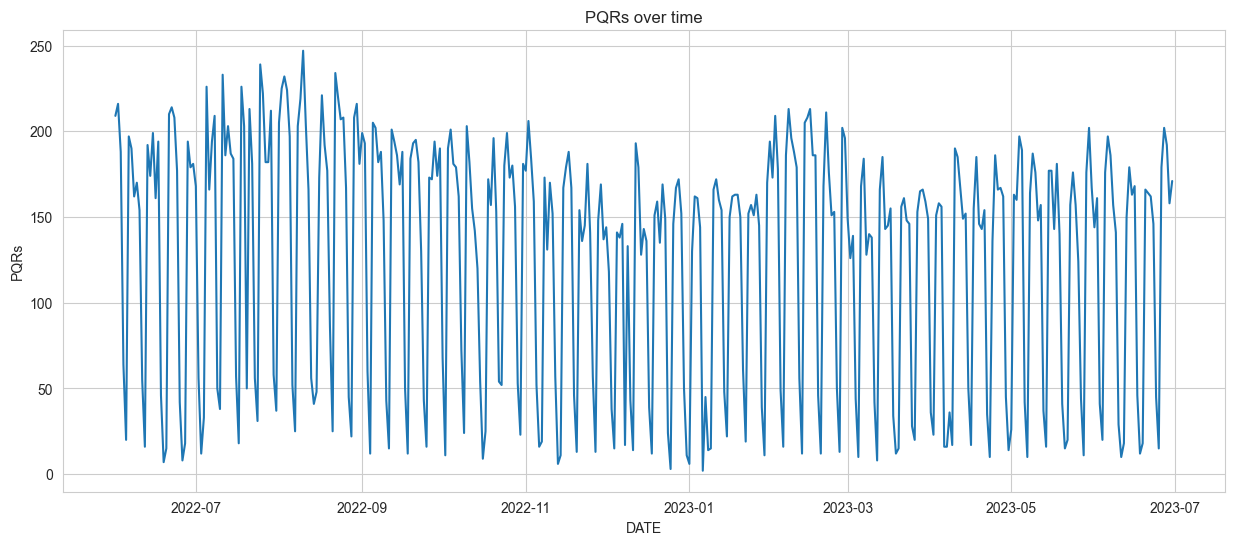

In [25]:
plt.figure(figsize=(15, 6))
sns.lineplot(data=PQRS_over_time_df, x='DATE', y='PQRs')
plt.title('PQRs over time')

In [26]:
PQRS_over_time_df.to_csv('results/PQRS_over_time.csv', index=False)

As can be seen in the graph above, the number of PQRs has been cyclical, with peaks and valleys, but with no clear trend, indicating that the number of PQRs is not increasing or decreasing over time, just a slight peak in around 2022-08.

## 4.2 How are PQRs distributed in different typologies and what conclusions can be drawn from this?

In [27]:
PQRs_typology_df = pqr_df.groupby("Tipologia").size().reset_index(name="PQRs")
PQRs_typology_df.head()

,Tipologia,PQRs
0,Reclamo,6813
1,Servicio,43187


Text(0.5, 1.0, 'Typologies distribution')

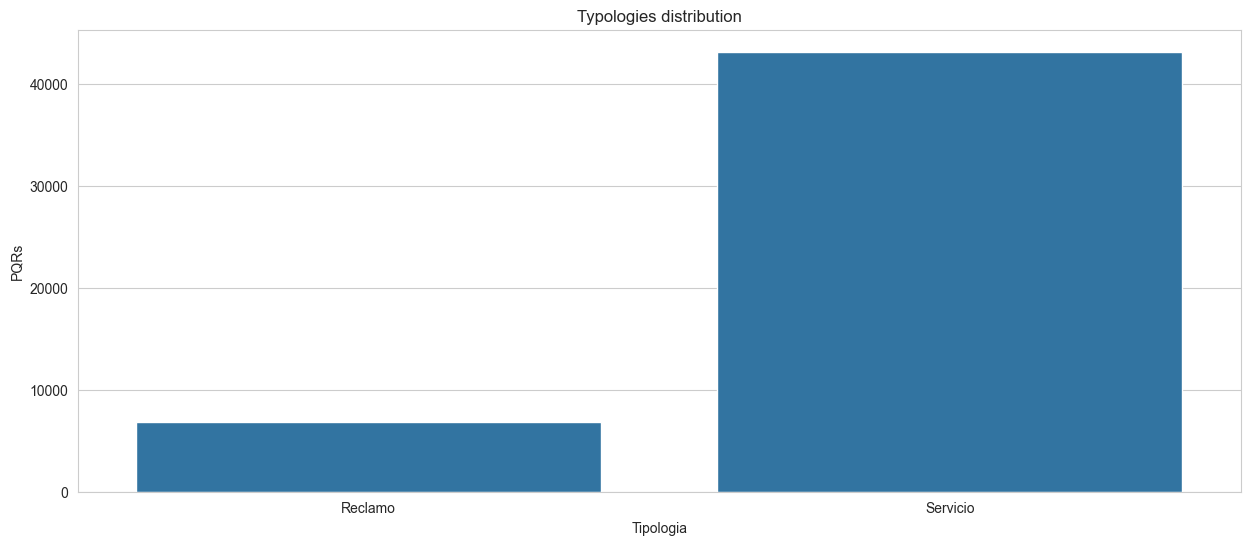

In [28]:
plt.figure(figsize=(15, 6))
sns.barplot(data=PQRs_typology_df, x="Tipologia", y="PQRs")
plt.title('Typologies distribution')

In [29]:
PQRs_typology_df.to_csv('results/PQRs_typology.csv', index=False)

As it can be seen in the graph above, in the typology distribution, by far the most popular typology type is for services in comparisson with complaints. Further analysis is needed to understand the reasons behind the high volume of PQRs in the services category, as it could indicate potential issues with the bank's services.

## 4.3 Does it make sense to analyze typologies? Why?

Yes, it makes sense to analyze typologies, as it can provide insights into the most common reasons for PQRs, which can help the bank identify areas for improvement and prioritize resources accordingly.

## 4.4 What analysis do you propose for the development by typology that can extract the greatest possible value from the data?

I propose analyzing further into the names and categories of the typologies to identify the most common reasons for PQRs and prioritize resources accordingly. Additionally, it would be interesting to analyze the typologies by the business segment and products to identify potential areas for improvement and new product development.

### 4.4.1 Typologies distribution by name

In [30]:
PQRs_typology_by_name_df = pqr_df.groupby("Nombre Tipologia").size().reset_index(name="PQRs")
PQRs_typology_by_name_df.head()

,Nombre Tipologia,PQRs
0,Aclaracion Asistencias IKE/IGS,25
1,Aclaración Productos Reclamo,461
2,Aclaración Productos Servicio,5471
3,Aclaración seguros,314
4,Actualización Dirección y Telf,24


In [31]:
# Exploring how many typologies are in the dataset
PQRs_typology_by_name_df.shape

(85, 2)

In [32]:
# Sorting the typologies by the number of PQRs, as it can be seen that there are 85 typologies, it is not possible to visualize all the typologies
# Thus, the typologies will be sorted by the number of PQRs and there will be a limit of 10 typologies
PQRs_typology_by_name_df = PQRs_typology_by_name_df.sort_values(by='PQRs', ascending=False).head(10)

Text(0.5, 1.0, 'Typologies distribution by name')

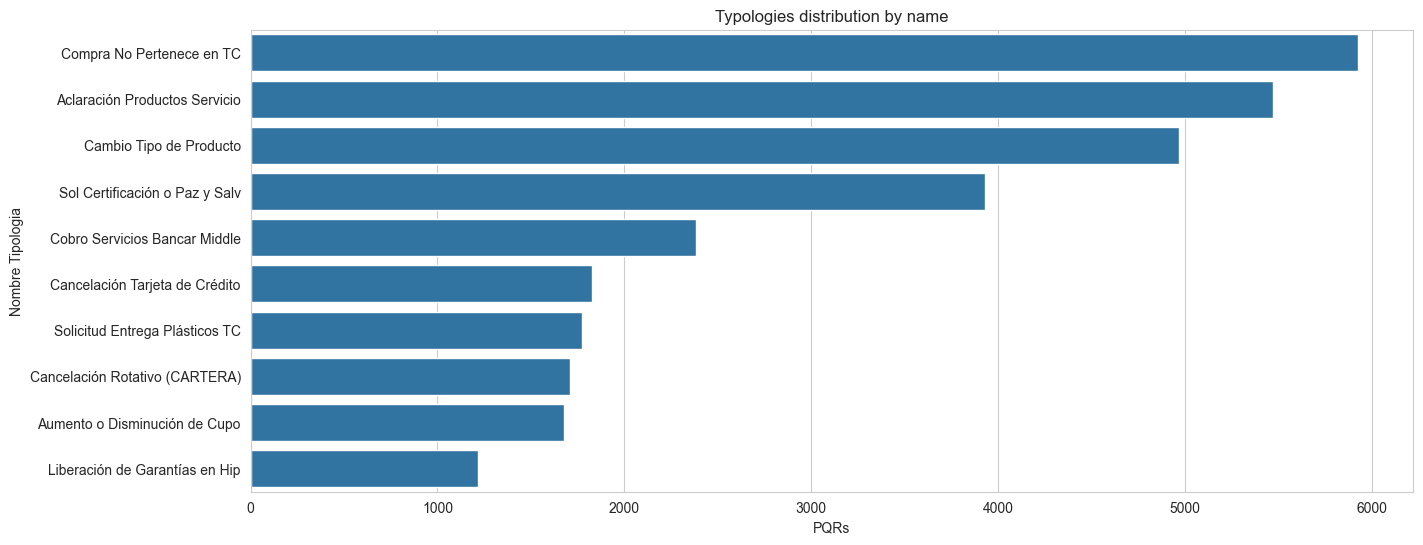

In [33]:
plt.figure(figsize=(15, 6))
sns.barplot(data=PQRs_typology_by_name_df, y="Nombre Tipologia", x="PQRs")
plt.title('Typologies distribution by name')

In [34]:
PQRs_typology_by_name_df.to_csv('results/PQRs_typology_by_name.csv', index=False)

As it can be seen in the graph above the most popular typologies are "Compra No Pertenece en TC", "Aclaración Productos Servicio", "Cambio Tipo de Producto" and "Solu Certificación o Pax y Salv" this information can be used to prioritize resources and identify areas for improvement. "Compra No Pertenece en TC" is a very alarming typology as it is the most popular typology, indicating that there may be issues with the bank's credit card security services.

### 4.4.2 Typologies distribution by category

In [35]:
PQRS_typology_by_category_df = pqr_df.groupby("Tipologia Squad").size().reset_index(name="PQRs")
PQRS_typology_by_category_df.head()

,Tipologia Squad,PQRs
0,Aclaraciones de Saldo,462
1,Bloqueo TC,252
2,Cobro de Servicios Bancarios,2670
3,Entegra TC,1772
4,Fallas Cajeros,394


In [36]:
# Exploring how many typologies are in the dataset
PQRS_typology_by_category_df.shape

(9, 2)

In [37]:
# Sorting the typologies by the number of PQRs, as it can be seen that there are 10 typologies, it is possible to visualize all the typologies
PQRS_typology_by_category_df = PQRS_typology_by_category_df.sort_values(by='PQRs', ascending=False)

Text(0.5, 1.0, 'Typologies distribution by category')

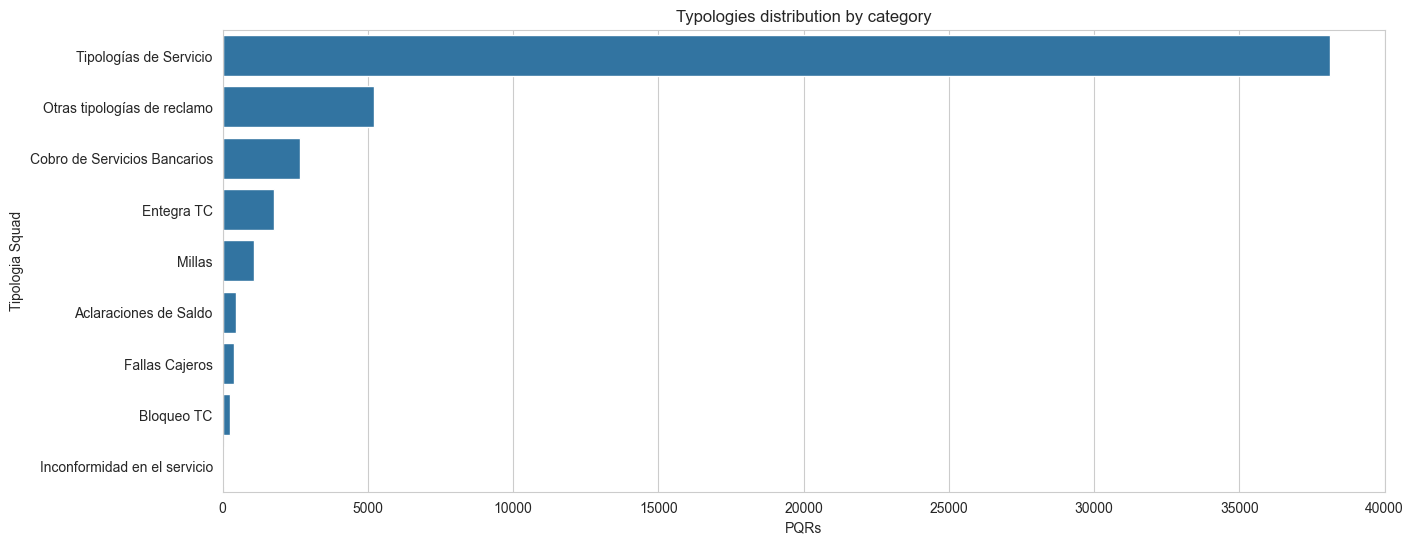

In [38]:
plt.figure(figsize=(15, 6))
sns.barplot(data=PQRS_typology_by_category_df, y="Tipologia Squad", x="PQRs")
plt.title('Typologies distribution by category')

In [39]:
PQRS_typology_by_category_df.to_csv('results/PQRS_typology_by_category.csv', index=False)

As it can be seen in the graph above the most popular typologies are from Services by a huge margin. This suggests that the bank should focus on analyzing the services provided to the customers and improve the quality of the services.

### 4.4.3 Typologies name distribution by business segment

In [40]:
PQRs_typology_name_by_segment_df = pqr_df.merge(business_segment_df, on='ID Cliente 2')
PQRs_typology_name_by_segment_df = PQRs_typology_name_by_segment_df.groupby(['Nombre Tipologia', 'Segmento']).size().reset_index(name='PQRs')
PQRs_typology_name_by_segment_df.head()

,Nombre Tipologia,Segmento,PQRs
0,Aclaracion Asistencias IKE/IGS,CLASICO,19
1,Aclaracion Asistencias IKE/IGS,PREFERENTE,8
2,Aclaración Productos Reclamo,CLASICO,363
3,Aclaración Productos Reclamo,EMPRESAS,2
4,Aclaración Productos Reclamo,PREFERENTE,198


In [41]:
PQRs_typology_name_by_segment_df = PQRs_typology_name_by_segment_df.sort_values(by='PQRs', ascending=False).head(10)

Text(0.5, 1.0, 'Typologies category distribution by business segment')

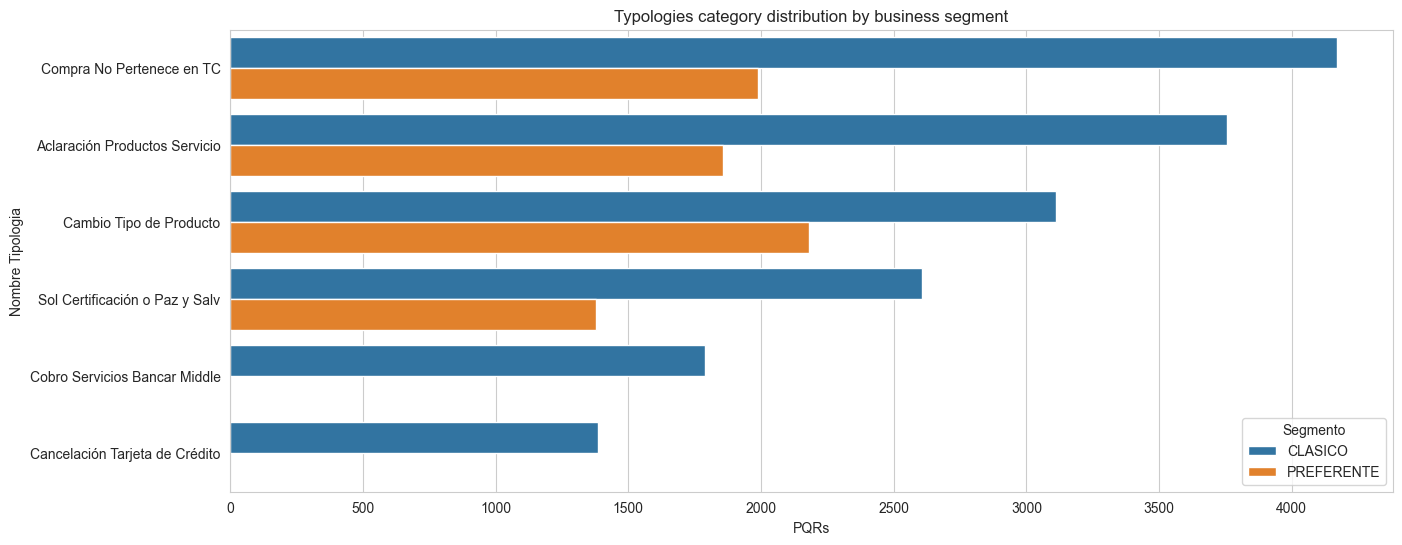

In [42]:
plt.figure(figsize=(15, 6))
sns.barplot(data=PQRs_typology_name_by_segment_df, y="Nombre Tipologia", x="PQRs", hue="Segmento")
plt.title('Typologies category distribution by business segment')

In [43]:
PQRs_typology_name_by_segment_df.to_csv('results/PQRs_typology_category_by_segment.csv', index=False)


AS it can be seen in the graph, there is a higher concentration of PQRs in the "CLASICO" segment compared to the "PREFERENTE" segment across all analyzed categories. This suggests that customers in the "CLASICO" segment face more issues or make more requests in areas such as "Compra No Pertenece en TC," "Aclaración Productos Servicio," and "Solu Certificación o Pax y Salv." While the "PREFERENTE" segment also registers PQRs, they are significantly fewer, possibly indicating a better service experience or lower interaction volume compared to the "CLASICO" segment.

### 4.4.4 Typologies category distribution by products

In [44]:
PQRs_typology_name_by_product_df = pqr_df.merge(products_df, on='ID Cliente 2')
PQRs_typology_name_by_product_df = PQRs_typology_name_by_product_df.groupby(['Nombre Tipologia', 'Nombre Producto']).size().reset_index(name='PQRs')
PQRs_typology_name_by_product_df = PQRs_typology_name_by_product_df.sort_values(by='PQRs', ascending=False).head(10)

<Axes: xlabel='PQRs', ylabel='Nombre Tipologia'>

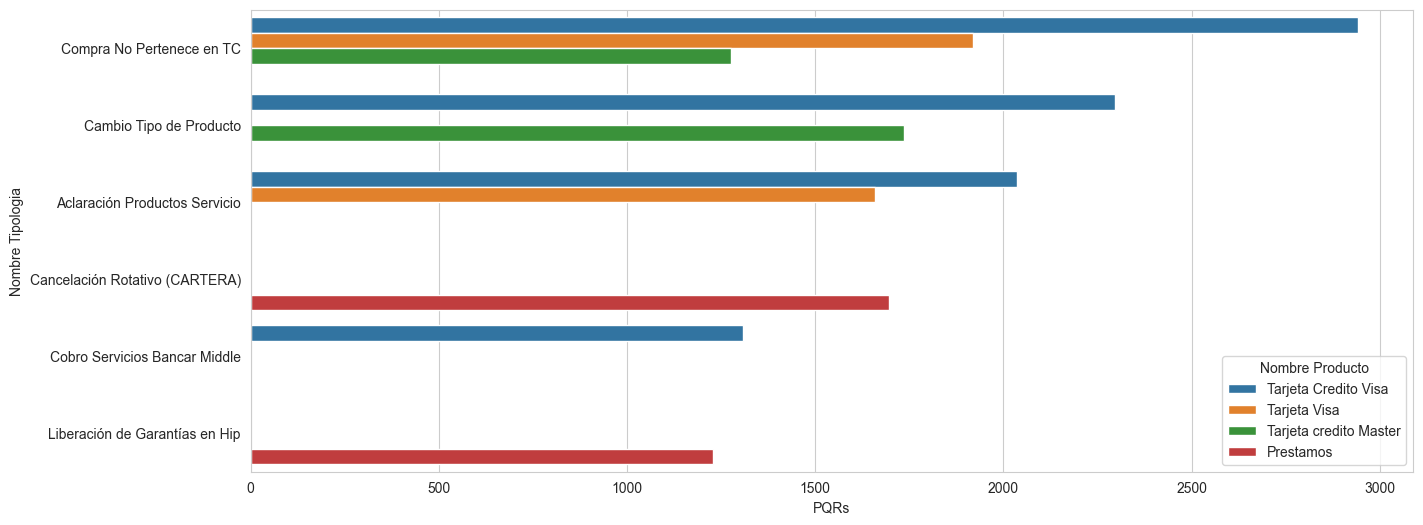

In [45]:
plt.figure(figsize=(15, 6))
sns.barplot(data=PQRs_typology_name_by_product_df, y="Nombre Tipologia", x="PQRs", hue="Nombre Producto")

In [46]:
PQRs_typology_name_by_product_df.to_csv('results/PQRs_typology_category_by_product.csv', index=False)

As it can be seen, the graph highlights the distribution of PQRs across different financial products in various typologies. "Tarjeta Credito Visa" dominates the majority of PQRs, particularly in the "Compra No Pertenece en TC" and "Aclaración Productos Servicio" categories, followed by "Tarjeta credito Master" and "Tarjeta Visa." The "Cancelación Rotativo (CARTERA)" and "Liberación de Garantías en Hip" categories are heavily associated with "Préstamos," indicating that issues in these areas are mostly related to loan products. Overall, credit cards, especially "Tarjeta Credito Visa," generate the highest volume of PQRs, whereas loan-related PQRs are concentrated in specific cancellation and guarantee-related typologies. Again the "Compra No Pertenece en TC" typology is the most popular, indicating that there may be issues with the bank's credit card security services, this could be also a reason for the high volume of "Cambio Tipo de Producto" typology for this product. 

# 4.5 What are the most consulted products in the Bank's database?

In [47]:
most_consulted_products_df = pqr_df.merge(products_df, on='ID Cliente 2')
most_consulted_products_df = most_consulted_products_df.groupby('Nombre Producto').size().reset_index(name='PQRs')
most_consulted_products_df = most_consulted_products_df.sort_values(by='PQRs', ascending=False).head(10)
most_consulted_products_df.head()

,Nombre Producto,PQRs
11,Tarjeta Credito Visa,16900
12,Tarjeta Visa,10716
13,Tarjeta credito Master,8201
6,Prestamos,8138
2,Cuenta de Ahorro,7422


Text(0.5, 1.0, 'Most consulted products')

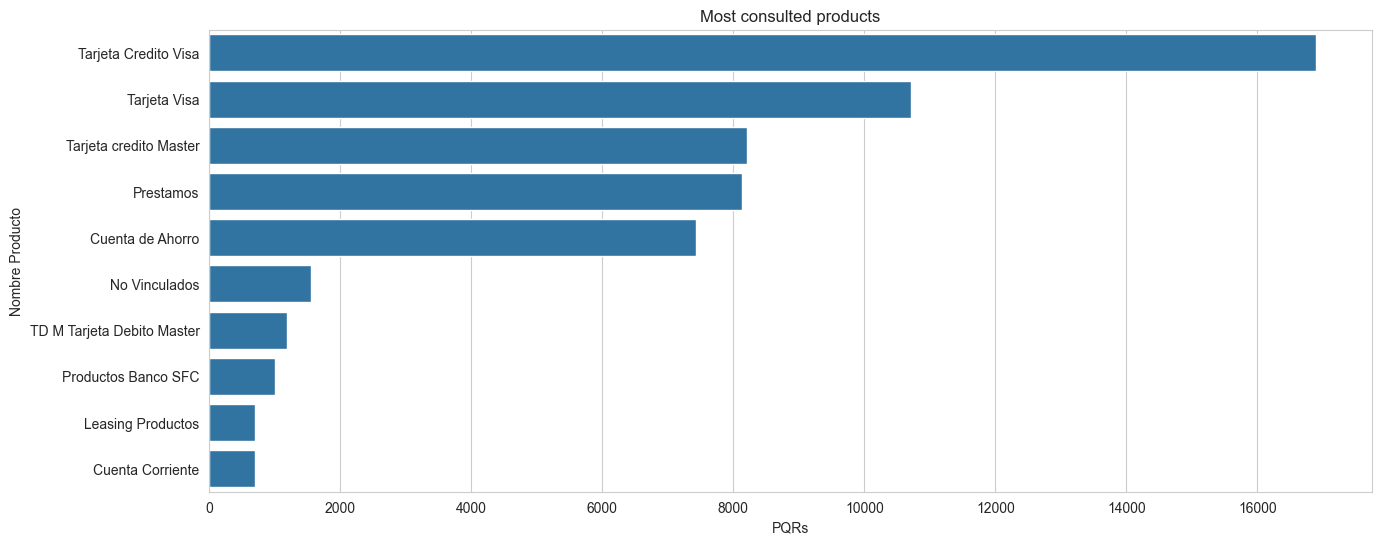

In [48]:
plt.figure(figsize=(15, 6))
sns.barplot(data=most_consulted_products_df, y='Nombre Producto', x='PQRs')
plt.title('Most consulted products')

In [49]:
most_consulted_products_df.to_csv('results/most_consulted_products.csv', index=False)

As it can be seen in the graph above, the most consulted products are "Tarjeta Credito Visa," "Tarjeta Credito Master," and "Tarjeta Visa," indicating that credit card products are the most popular among customers. This information can be used to prioritize resources and identify areas for improvement in credit card services, also that is one explanation for the high volume of PQRs related to credit cards, specifically in "Tarjeta Credito Visa."

# 4.6 What is the distribution of PQRs by contact channel and what conclusions can be drawn from that?

In [50]:
PQRs_by_contact_channel1_df = pqr_df.groupby('CANAL1').size().reset_index(name='PQRs')
PQRs_by_contact_channel1_df = PQRs_by_contact_channel1_df.sort_values(by='PQRs', ascending=False).head(10)
PQRs_by_contact_channel1_df.head()

,CANAL1,PQRs
6,Call Center,31212
18,Oficinas,5054
8,Chat,4386
3,Buzón Compra No Pertenece,2547
10,Correspondencia,1341


Text(0.5, 1.0, 'PQRs by contact channel')

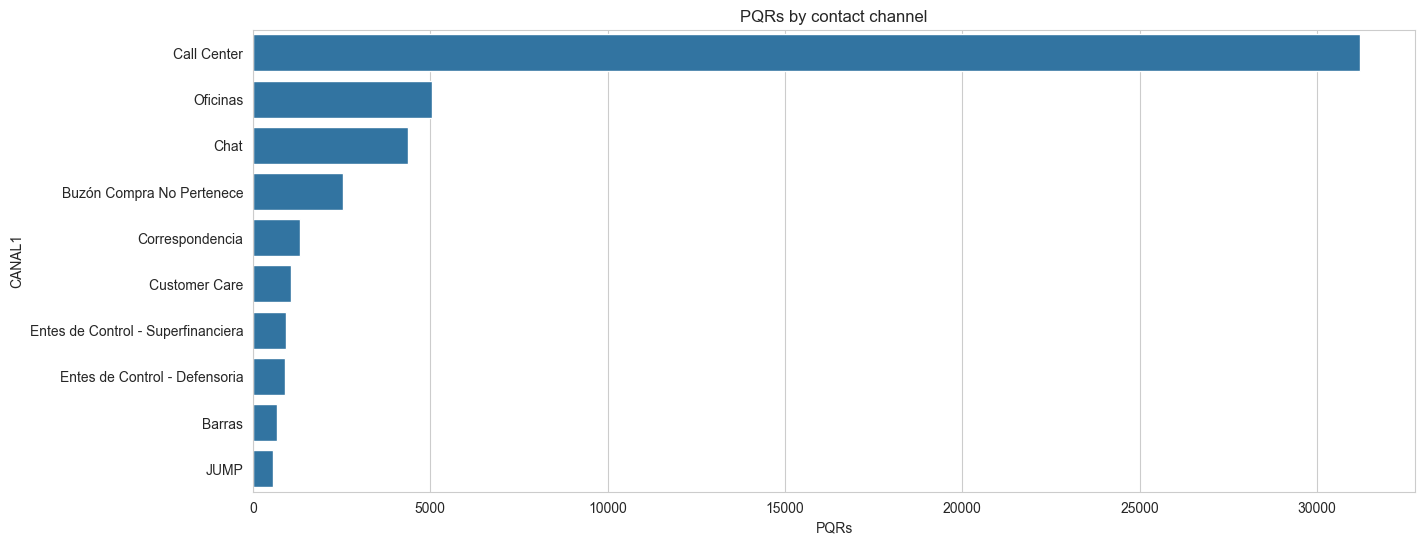

In [51]:
plt.figure(figsize=(15, 6))
sns.barplot(data=PQRs_by_contact_channel1_df, y='CANAL1', x='PQRs')
plt.title('PQRs by contact channel')

In [52]:
PQRs_by_contact_channel1_df.to_csv('results/PQRs_by_contact_channel1.csv', index=False)

In [53]:
PQRs_by_contact_channel2_df = pqr_df.groupby('CANAL2').size().reset_index(name='PQRs')
PQRs_by_contact_channel2_df = PQRs_by_contact_channel2_df.sort_values(by='PQRs', ascending=False)
PQRs_by_contact_channel2_df.head()

,CANAL2,PQRs
0,Canales Banco,47010
1,Customer Care,1065
4,Superfinanciera,931
2,Defensoria,893
3,Presidencia,101


Text(0.5, 1.0, 'PQRs by contact channel')

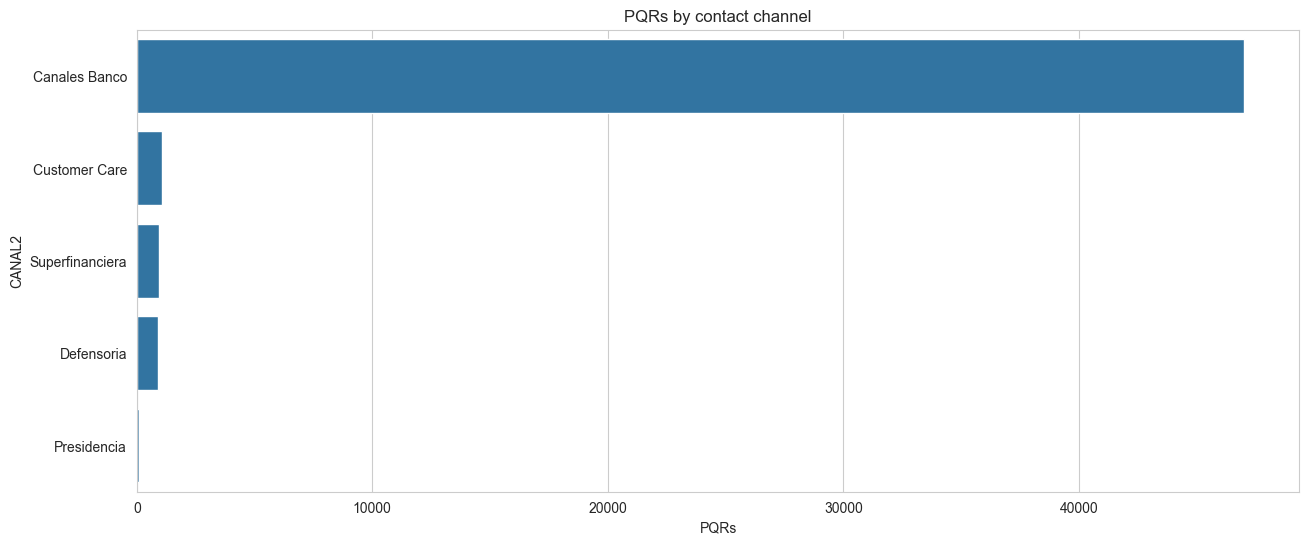

In [54]:
plt.figure(figsize=(15, 6))
sns.barplot(data=PQRs_by_contact_channel2_df, y='CANAL2', x='PQRs')
plt.title('PQRs by contact channel')

In [55]:
PQRs_by_contact_channel2_df.to_csv('results/PQRs_by_contact_channel2.csv', index=False)

As it can be seen by far the most popular contact channel is the "Call Center," and  "Canales Banco" and "Oficina Física." This information can be used to prioritize resources and identify areas for improvement in the call center services, as it is the most popular contact channel.

## 4.7 What would you propose to improve the user experience and the way the bank manages PQRs?

After analyzing the data, I would propose the following to improve the user experience and the way the bank manages PQRs: 
1. Address the most popular and concerning typology of them all, "Compra No Pertenece en TC" This is very concerning because it shows that a high number of customers are facing issues with the bank's credit card security services. specially in the "Tarjeta Credito Visa" product. The bank should investigate the root cause of these issues and take immediate action to improve the security of credit card services and also add some other security features to the credit card services, in order to prevent fraud. 
2. Add digital features in the platform to allow customers to solve their issues without the need to contact the call center, this will reduce the volume of PQRs in the call center and improve the user experience. Also, some other services can be automated to reduce the volume of PQRs in the call center.
3. Improve the presentation of the products offered, as it is seen that one of the most common PQRs are related to clarifications about the products, this could be due to the lack of information about the products offered by the bank.



## 4.8 Optional: Use the "" column to extract the most frequent reasons for query in calls received in the Bank’s call center.

The column that will be used in the analysis is the "Motivo_Limpiado" column, as it contains the cleaned reasons for the queries.

In [56]:
most_frequent_reasons_df = pqr_df[pqr_df['CANAL1'] == 'Call Center'].groupby('Motivo_Limpiado').size().reset_index(name='PQRs')
# NaN values will be removed from the dataset
most_frequent_reasons_df = most_frequent_reasons_df.dropna()
# Sorting the reasons by the number of PQRs and selecting the top 10 reasons
most_frequent_reasons_df = most_frequent_reasons_df.sort_values(by='PQRs', ascending=False).head(10)

In [57]:
most_frequent_reasons_df.head(10)

,Motivo_Limpiado,PQRs
5756,cliente reclama por las transacciones cargada...,329
7298,contrato: ******** ajuste: ******** sqlfbcrbo...,225
165,******** boggutsb ******** ******** pro...,21
7294,contrato: ******** ajuste: ******** bogninjf ...,17
7297,contrato: ******** ajuste: ******** oliverd ...,14
7292,contrato: ******** ajuste: ******** bogmarw**...,11
5755,cliente reclama por las transacciones cargada...,10
7381,contrato:******** ajuste:******** sqlfbcrbot ...,9
880,bogromk******** ******** ********,7
6502,cliente solicita devoluci n de saldo a favor ...,7


In [58]:
most_frequent_reasons_df.to_csv('results/most_frequent_reasons.csv', index=False)